$$0=A+ B\chi_1 + \mu_{11}\chi_1^2 +\chi_1 \mu_{12}\chi_2+\chi_1 \mu_{13}\chi_3$$
$$0=A+ B\chi_2 + \chi_2 \mu_{21}\chi_1 +\mu_{22}\chi_2^2+\chi_2 \mu_{23}\chi_3$$
$$0=A+ B\chi_3 + \chi_3 \mu_{31}\chi_1 +\chi_3 \mu_{32}\chi_2+ \mu_{33}\chi_3^2$$

In [48]:
using ModelingToolkit, NonlinearSolve

@variables χ₁ χ₂ χ₃
@parameters A₁ A₂ B

μ₁₁ = 16273.465487425427
μ₂₂ = 7800.653148254713
μ₃₃ = 140.00867213154856
μ₁₂ = 8.841868906761077e-7
μ₁₃ = 0.0
μ₂₃ = 11.674613405026601
μ₂₁ = 0.0583254283653529
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

eqs = [
    0 ~ A₁ - B*χ₁ + μ₁₁*χ₁^2 + χ₁*μ₁₂*χ₂ + χ₁*μ₁₃*χ₃,
    0 ~ A₂ - B*χ₂ + χ₂*μ₂₁*χ₁ + μ₂₂*χ₂^2 + χ₂*μ₂₃*χ₃,
    0 ~ - B*χ₃ + χ₃*μ₃₁*χ₁ + χ₃*μ₃₂*χ₂ + μ₃₃*χ₃^2
]

@mtkbuild ns = NonlinearSystem(eqs, [χ₁, χ₂, χ₃], [A₁, A₂, B])

guess = [χ₁ => 20000, χ₂ => 80000, χ₃ => 0.0]
ps = [A₁ => 370.91, A₂ => 702.1, B => 0.255]

prob = NonlinearProblem(ns, guess, ps)
sol = solve(prob, NewtonRaphson())

retcode: MaxIters
u: 3-element Vector{Float64}:
  0.046634403901410715
 -0.0010649195525640476
  0.0

┌ Warning: At t=1.6024293416734622e-9, dt was forced below floating point epsilon 2.0679515313825692e-25, and step error estimate = 1.0373389320205764. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/uri/.julia/packages/SciMLBase/hrt1J/src/integrator_interface.jl:633


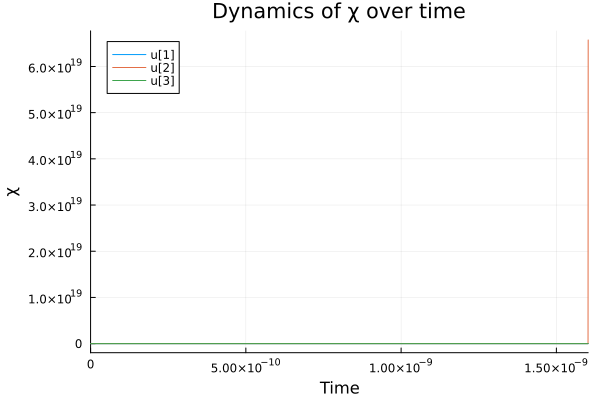

In [49]:
using DifferentialEquations, Plots

# Define the constants
μ₁₁ = 16273.465487425427
μ₂₂ = 7800.653148254713
μ₃₃ = 140.00867213154856
μ₁₂ = 8.841868906761077e-7
μ₁₃ = 0.0
μ₂₃ = 11.674613405026601
μ₂₁ = 0.0583254283653529
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

# Define the system as a function
function bcl2!(dχ, χ, p, t)
    χ₁, χ₂, χ₃ = χ
    A₁, A₂, B = p
    
    dχ[1] = A₁ - B*χ₁ + μ₁₁*χ₁^2 + χ₁*μ₁₂*χ₂ 
    dχ[2] = A₂ - B*χ₂ + χ₂*μ₂₁*χ₁ + μ₂₂*χ₂^2 + χ₂*μ₂₃*χ₃
    dχ[3] = - B*χ₃ + χ₃*μ₃₂*χ₂ + μ₃₃*χ₃^2

end

χ₀ = [20000, 80000, 0]
tspan = (0.0, 10)
params = [370.91, 702.10, 0.255]

# Define the ODE problem
prob = ODEProblem(bcl2!, χ₀ , tspan, params)
sol = solve(prob, Rodas5P(), reltol=1e-6, abstol=1e-6)

# Plot the dynamics of χ₃ as a function of time
plot(sol, title="Dynamics of χ over time", xlabel="Time", ylabel="χ")

In [50]:
using ModelingToolkit, DifferentialEquations, Plots

# Define the parameters and variables
@parameters t A B
@variables χ₁(t) χ₂(t) χ₃(t)

# Define the differential equations
Dχ₁ = Differential(t)(χ₁)
Dχ₂ = Differential(t)(χ₂)
Dχ₃ = Differential(t)(χ₃)

# Define the constants
μ₁₁ = 16273.465487425427
μ₂₂ = 7800.653148254713
μ₃₃ = 140.00867213154856
μ₁₂ = 8.841868906761077e-7
μ₁₃ = 0.0
μ₂₃ = 11.674613405026601
μ₂₁ = 0.0583254283653529
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

# Define the system of differential equations
eqs = [
    Dχ₁ ~ A - B*χ₁ + μ₁₁*χ₁^2 + χ₁*μ₁₂*χ₂ + χ₁*μ₁₃*χ₃,
    Dχ₂ ~ A - B*χ₂ + χ₂*μ₂₁*χ₁ + μ₂₂*χ₂^2 + χ₂*μ₂₃*χ₃,
    Dχ₃ ~ - B*χ₃ + χ₃*μ₃₁*χ₁ + χ₃*μ₃₂*χ₂ + μ₃₃*χ₃^2
]

@named sys = ODESystem(eqs, t, [χ₁, χ₂, χ₃], [A, B])

# Simplify the system
simplified_sys = structural_simplify(sys)

# Initial conditions
u0 = [χ₁ => 20000.0, χ₂ => 80000.0, χ₃ => 0.0001]

# Parameters
p = [A => 1201.64059, B => .255]

# Time span for the simulation
tspan = (0.0, 1000.0)

# Define the ODE problem
prob = ODEProblem(simplified_sys, u0, tspan, p)

# Solve the ODE problem using a stiff solver with adjusted tolerances
sol = solve(prob, Rodas5(), reltol=1e-8, abstol=1e-8)

┌ Warning: At t=1.6024279990422905e-9, dt was forced below floating point epsilon 2.0679515313825692e-25, and step error estimate = 1.3230966290256556. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/uri/.julia/packages/SciMLBase/hrt1J/src/integrator_interface.jl:633


retcode: Unstable
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 472-element Vector{Float64}:
 0.0
 1.0709792320138226e-10
 1.553090061276878e-10
 2.256575813964404e-10
 2.96006156665193e-10
 3.6635473193394554e-10
 4.367033072026981e-10
 5.070518824714507e-10
 5.774004577402032e-10
 6.477490330089558e-10
 ⋮
 1.602427999042288e-9
 1.6024279990422884e-9
 1.6024279990422888e-9
 1.6024279990422893e-9
 1.6024279990422897e-9
 1.6024279990422899e-9
 1.60242799904229e-9
 1.6024279990422903e-9
 1.6024279990422905e-9
u: 472-element Vector{Vector{Float64}}:
 [20000.0, 80000.0, 0.0001]
 [20722.319704494654, 85729.73167441519, 0.00010002070444810028]
 [21064.789622431323, 88585.83816650878, 0.00010003051514935475]
 [21585.326007680942, 93112.29485305185, 0.00010004543534224014]
 [22132.240390272294, 98126.23550939542, 0.00010006114065152731]
 [22707.589936843047, 103710.89259858921, 0.00010007771817153763]
 [23313.651435665102, 109969.59007346738, 0.000100095270335293

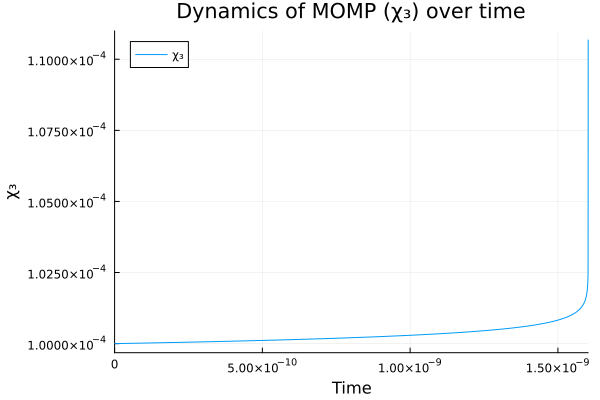

In [51]:
# Plot the dynamics of χ₃ as a function of time
plot(sol, vars=[χ₃], title="Dynamics of MOMP (χ₃) over time", xlabel="Time", ylabel="χ₃")

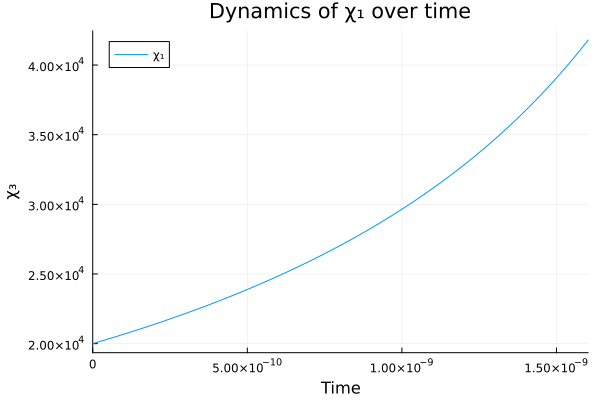

In [52]:
plot(sol, vars=[χ₁], title="Dynamics of χ₁ over time", xlabel="Time", ylabel="χ₃")

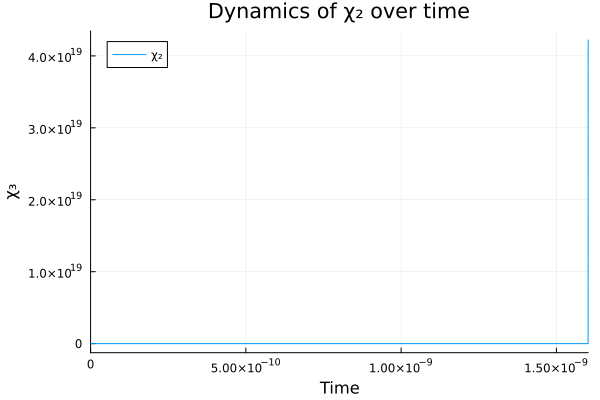

In [53]:
plot(sol, vars=[χ₂], title="Dynamics of χ₂ over time", xlabel="Time", ylabel="χ₃")